<a href="https://colab.research.google.com/github/keshavsharma52/RESUME-PROJECT28-11/blob/main/Copy_of_PP_100_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Ayush_Raghav resume.pdf to Ayush_Raghav resume (3).pdf
Saving functionalsample.pdf to functionalsample (4).pdf
Saving Gray and White Simple Clean Resume (1).pdf to Gray and White Simple Clean Resume (1) (3).pdf
Saving KESHAV RESUME.pdf to KESHAV RESUME (3).pdf
Saving My_resume (1).pdf to My_resume (1) (3).pdf


In [ ]:
# Load the CSV file (since you downloaded .csv from Kaggle)
df = pd.read_csv("UpdatedResumeDataSet.csv")

# Check shape and first few rows
print(df.shape)
df.head()

(962, 2)


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


,0
Category,0
Resume,0


In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)              # remove links
    text = re.sub(r'[^a-zA-Z]', ' ', text)          # keep only letters
    text = text.lower()                             # lowercase
    text = re.sub(r'\s+', ' ', text).strip()        # remove extra spaces
    return text

df['cleaned'] = df['Resume'].apply(clean_text)
df[['Resume','cleaned']].head()


,Resume,cleaned
0,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e uit rgpv data...
2,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [ ]:
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])
print(df[['Category','Category_encoded']].head())


       Category  Category_encoded
0  Data Science                 6
1  Data Science                 6
2  Data Science                 6
3  Data Science                 6
4  Data Science                 6


In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['cleaned'])
y = df['Category_encoded']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9844559585492227


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "KNN": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5)),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Naive Bayes": OneVsRestClassifier(MultinomialNB()),
    "SVM": OneVsRestClassifier(LinearSVC()),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")


KNN: 0.9845
Logistic Regression: 0.9896
Naive Bayes: 0.9793
SVM: 0.9948
Random Forest: 0.9948


                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
                   Hadoop       1.00      1.00      1.00     

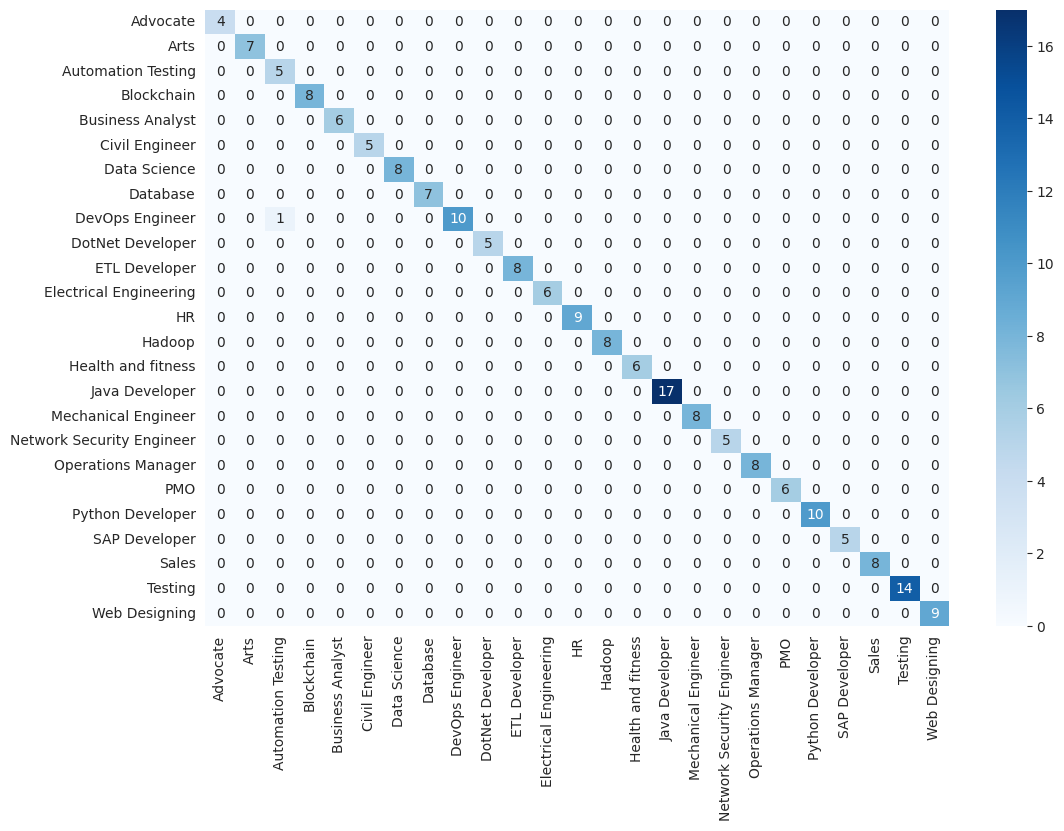

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, target_names=le.classes_))

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [ ]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
# Upload 1 to 50+ resumes at the same time
uploaded_files = files.upload()
results = []

# Import PyPDF2 (already pip installed)
from PyPDF2 import PdfReader # This import is crucial for PDF processing

print("\n⏳ Processing resumes...") # Removed "with OCR support" as it's not OCR for plain PDF text extraction

for filename in uploaded_files.keys():
    resume_text = ""

    # Extract text from resume (using logic from hqC-w_fLvu6N)
    if filename.endswith(".pdf"):
        try:
            reader = PdfReader(filename)
            for page in reader.pages:
                resume_text += page.extract_text()
        except Exception as e:
            print(f"⚠️ Error reading PDF {filename}: {e}")
            continue
    elif filename.endswith(".txt"):
        try:
            with open(filename, "r", encoding="utf-8") as f:
                resume_text = f.read()
        except Exception as e:
            print(f"⚠️ Error reading TXT {filename}: {e}")
            continue
    else:
        print(f"⚠️ Skipping unsupported file type: {filename}")
        continue

    if len(resume_text.strip()) < 20:
        print(f"⚠️ No readable text in: {filename}")
        continue

    cleaned = clean_text(resume_text) # clean_text is defined in nBOrC2EMcbhO
    vector = tfidf.transform([cleaned]) # Use tfidf vectorizer from ApnEINMncgcG

    # Use the 'model' variable which holds the OneVsRestClassifier with KNeighborsClassifier
    pred_probs = model.decision_function(vector)
    pred_idx = pred_probs.argmax() # Get the index of the best prediction
    confidence = pred_probs[0][pred_idx] # Confidence score

    # Get the role name using LabelEncoder 'le' from bJdj99Rlcd84
    role = le.inverse_transform([pred_idx])[0]

    results.append([filename, role, confidence])

ranking_df = pd.DataFrame(results,
                          columns=["Resume Name", "Predicted Job Role", "Confidence Score"])
ranking_df = ranking_df.sort_values(by="Confidence Score", ascending=False)

print("🏆 Final Ranking:")
ranking_df

Saving Ayush_Raghav resume.pdf to Ayush_Raghav resume (2).pdf
Saving functionalsample.pdf to functionalsample (3).pdf
Saving Gray and White Simple Clean Resume (1).pdf to Gray and White Simple Clean Resume (1) (2).pdf
Saving KESHAV RESUME.pdf to KESHAV RESUME (2).pdf
Saving My_resume (1).pdf to My_resume (1) (2).pdf

⏳ Processing resumes...
🏆 Final Ranking:


,Resume Name,Predicted Job Role,Confidence Score
4,My_resume (1) (2).pdf,Data Science,0.292180
3,KESHAV RESUME (2).pdf,Data Science,-0.255769
2,Gray and White Simple Clean Resume (1) (2).pdf,Data Science,-0.272051
0,Ayush_Raghav resume (2).pdf,Data Science,-0.595163
1,functionalsample (3).pdf,Health and fitness,-0.641076


In [ ]:
from google.colab import files
# Upload multiple resumes
uploaded = files.upload()

results = []

for fn in uploaded.keys():
    resume_text = ""

    # Extract text from resume
    if fn.endswith(".pdf"):
        reader = PdfReader(fn)
        for page in reader.pages:
            resume_text += page.extract_text()
    elif fn.endswith(".txt"):
        with open(fn, "r", encoding="utf-8") as f:
            resume_text = f.read()
    else:
        print(f"Skipping unsupported file: {fn}")
        continue

    # Preprocess
    cleaned_resume = clean_text(resume_text)
    resume_features = tfidf.transform([cleaned_resume])

    # Prediction + Confidence Score
    pred_probs = model.decision_function(resume_features)
    pred = pred_probs.argmax()
    confidence = pred_probs[0][pred]

    category_name = le.inverse_transform([pred])[0]

    results.append({
        "File": fn,
        "Predicted Category": category_name,
        "Confidence Score": round(confidence, 4)
    })

# Show Results
result_df = pd.DataFrame(results)
print("📊 Resume Evaluation Results:")
display(result_df)

# Identify Best Resume
best_resume = result_df.loc[result_df['Confidence Score'].idxmax()]
print("\n🏆 Best Resume Suggestion:")
print(best_resume)


Saving functionalsample.pdf to functionalsample (1).pdf
📊 Resume Evaluation Results:


,File,Predicted Category,Confidence Score
0,functionalsample (1).pdf,Health and fitness,-0.6411



🏆 Best Resume Suggestion:
File                  functionalsample (1).pdf
Predicted Category          Health and fitness
Confidence Score                       -0.6411
Name: 0, dtype: object
